# visualization of time trend

# Info
created by Marlene 

edited by Weisong since Jan 1st, 2025

purpose: visualization
# Pipeline
1. Read in different data
# Variables
1. 'clinician_dat' clinician data from xxxx to xxxx (time range)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import confusion_matrix as cm
import pickle

## readin data

In [11]:
clinician_dat = pd.read_csv('timetrend_all_blood_products_May5.csv')
clinician_dat = clinician_dat.query(
    "RefTime in ['req_any_before_anes', 'req_any_before_1hr_anes', 'req_any_before_1d_anes', 'req_after_inroom_30m','req_after_inroom_1h'] \
    and `Data Split` != 'train'") 
clinician_dat['Month'] = pd.to_datetime(clinician_dat['Month'])

## customized legend

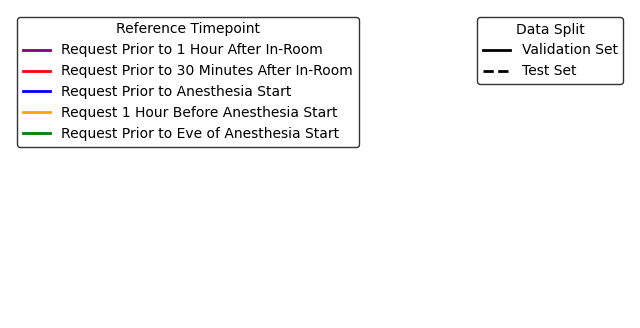

In [26]:

# Define labels
ref_time_labels = [
    'Request Prior to Anesthesia Start',
    'Request 1 Hour Before Anesthesia Start',
    'Request Prior to Eve of Anesthesia Start',
    'Request Prior to 30 Minutes After In-Room',
     'Request Prior to 1 Hour After In-Room'
    
]
data_split_labels = ['Validation Set', 'Test Set']

# Create legend handles for RefTime (lines with different colors)
ref_time_lines = [
    plt.Line2D([0], [0], color='purple', lw=2, label=ref_time_labels[4]),
    plt.Line2D([0], [0], color='red', lw=2, label=ref_time_labels[3]),
    plt.Line2D([0], [0], color='blue', lw=2, label=ref_time_labels[0]),
    plt.Line2D([0], [0], color='orange', lw=2, label=ref_time_labels[1]),
    plt.Line2D([0], [0], color='green', lw=2, label=ref_time_labels[2]),
   
]

# Create legend handles for Data Split (lines with different styles)
data_split_lines = [
    plt.Line2D([0], [0], color='black', lw=2, linestyle='-', label=data_split_labels[0]),
    plt.Line2D([0], [0], color='black', lw=2, linestyle='--', label=data_split_labels[1])
]

# Create the figure
fig, ax = plt.subplots(figsize=(8, 4))

# First legend: Reference Timepoints
legend1 = ax.legend(
    handles=ref_time_lines, 
    title='Reference Timepoint', 
    loc='upper left', 
    frameon=True
)
ax.add_artist(legend1)  # Add first legend to the plot

# Second legend: Data Split
legend2 = ax.legend(
    handles=data_split_lines, 
    title='Data Split', 
    loc='upper right', 
    frameon=True
)

# Customize appearance of legends
for legend in [legend1, legend2]:
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(1)

# Hide the plot axes to show only the legends
plt.axis('off')

# Display the plot with two legends
plt.show()


## graph - sensitivity

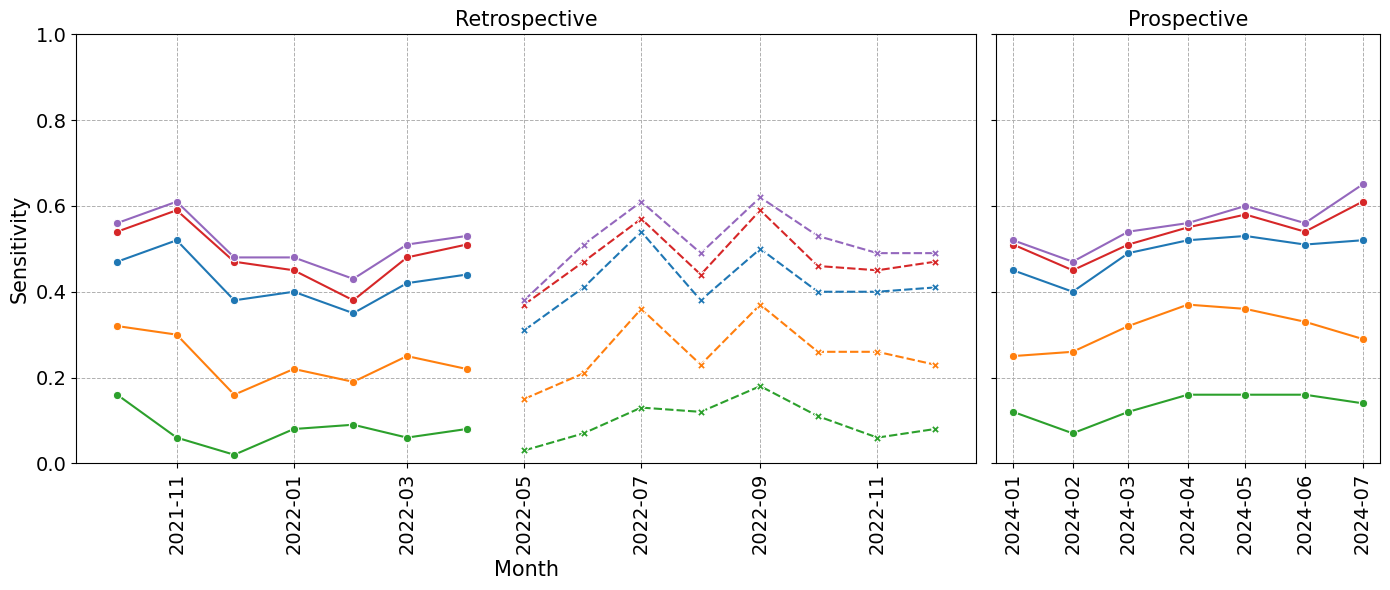

In [4]:
metric = 'Sensitivity'
clinician = clinician_dat[clinician_dat.Metric == metric]
# Filter the data into two subsets
data_prospective = clinician[clinician['Data Split'] == 'prospective']
data_retrospective = clinician[clinician['Data Split'] != 'prospective']

# Calculate the date range for each subset to determine the width ratio
range_prospective = pd.to_datetime(data_prospective['Month']).max() - pd.to_datetime(data_prospective['Month']).min()
range_retrospective = pd.to_datetime(data_retrospective['Month']).max() - pd.to_datetime(data_retrospective['Month']).min()

# Calculate width ratio
total_range = range_prospective + range_retrospective
width_ratio = [range_retrospective / total_range, range_prospective / total_range]

# Create the subplots with the calculated width ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': width_ratio},sharey=True)

# Plot for non-prospective data (left side)
sns.lineplot(
    data=data_retrospective,
    x='Month',
    y='Value',
    hue='RefTime',
    style='Data Split',
    dashes=True, 
    markers=True, 
    ax=axes[0]
)
axes[0].set_title('Retrospective',fontsize=15)
axes[0].set_xlabel('Month',fontsize=15)
axes[0].set_ylim([0,1.0])
axes[0].set_ylabel(metric,fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14) 
axes[0].tick_params(axis='y', labelsize=14) 
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].get_legend().remove()
# Plot for prospective data (right side)
sns.lineplot(
    data=data_prospective,
    x='Month',
    y='Value',
    hue='RefTime',
    style='Data Split',
    dashes=True, 
    markers=True, 
    ax=axes[1]
)
axes[1].set_title('Prospective',fontsize=15)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='x', rotation=90, labelsize=14) 
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[1].get_legend().remove()

# Adjust layout and display the plots 
plt.ylabel(metric,fontsize=16)
plt.tight_layout()
plt.show()


## graph - PPV

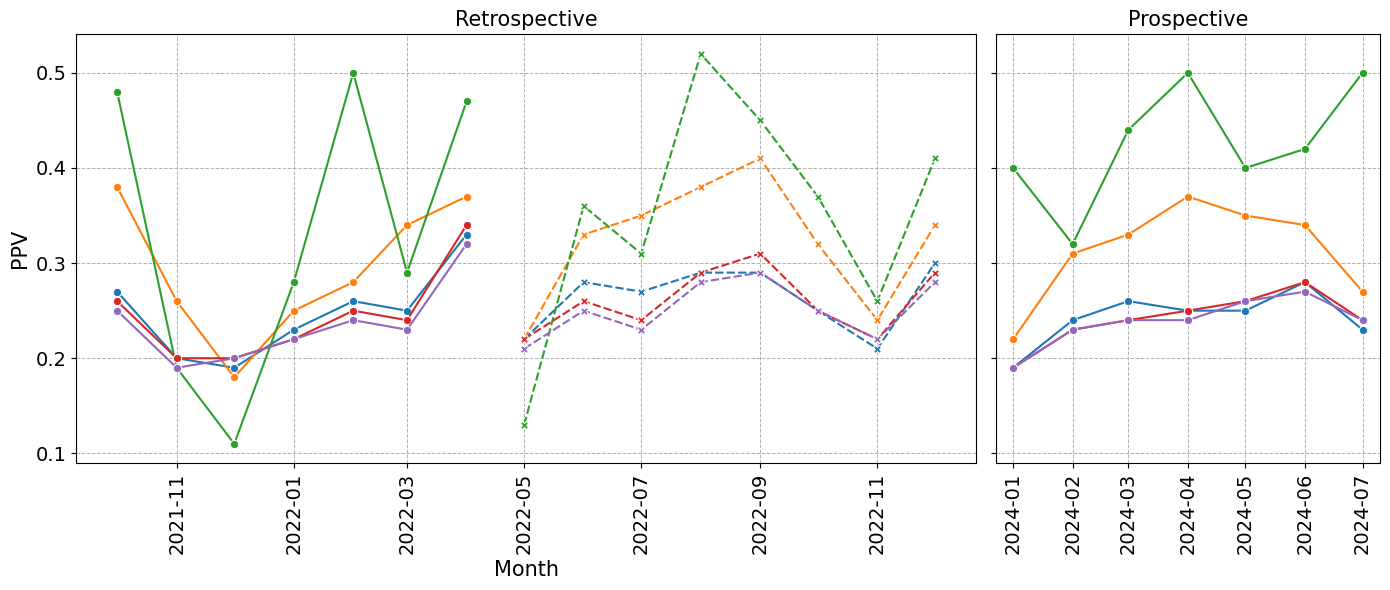

In [5]:
metric = 'PPV'
clinician = clinician_dat[clinician_dat.Metric == metric]
# Filter the data into two subsets
data_prospective = clinician[clinician['Data Split'] == 'prospective']
data_retrospective = clinician[clinician['Data Split'] != 'prospective']

# Calculate the date range for each subset to determine the width ratio
range_prospective = pd.to_datetime(data_prospective['Month']).max() - pd.to_datetime(data_prospective['Month']).min()
range_retrospective = pd.to_datetime(data_retrospective['Month']).max() - pd.to_datetime(data_retrospective['Month']).min()

# Calculate width ratio
total_range = range_prospective + range_retrospective
width_ratio = [range_retrospective / total_range, range_prospective / total_range]

# Create the subplots with the calculated width ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': width_ratio},sharey=True)

# Plot for non-prospective data (left side)
sns.lineplot(
    data=data_retrospective,
    x='Month',
    y='Value',
    hue='RefTime',
    style='Data Split',
    dashes=True, 
    markers=True, 
    ax=axes[0]
)
axes[0].set_title('Retrospective',fontsize=15)
axes[0].set_xlabel('Month',fontsize=15)
axes[0].set_ylabel(metric,fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14) 
axes[0].tick_params(axis='y', labelsize=14) 
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].get_legend().remove()
# Plot for prospective data (right side)
sns.lineplot(
    data=data_prospective,
    x='Month',
    y='Value',
    hue='RefTime',
    style='Data Split',
    dashes=True, 
    markers=True, 
    ax=axes[1]
)
axes[1].set_title('Prospective',fontsize=15)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='x', rotation=90, labelsize=14) 
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[1].get_legend().remove()

# Adjust layout and display the plots 
plt.ylabel(metric,fontsize=16)
plt.tight_layout()
plt.show()


## NPV

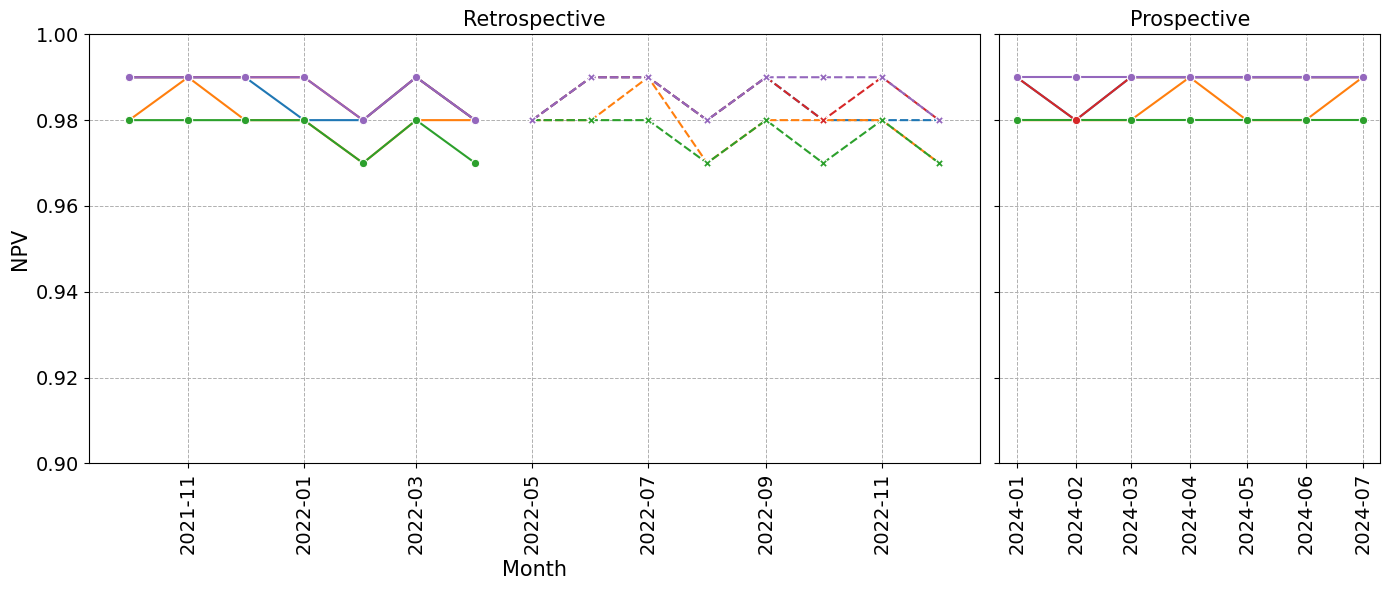

In [6]:
metric = 'NPV'
clinician = clinician_dat[clinician_dat.Metric == metric]
# Filter the data into two subsets
data_prospective = clinician[clinician['Data Split'] == 'prospective']
data_retrospective = clinician[clinician['Data Split'] != 'prospective']

# Calculate the date range for each subset to determine the width ratio
range_prospective = pd.to_datetime(data_prospective['Month']).max() - pd.to_datetime(data_prospective['Month']).min()
range_retrospective = pd.to_datetime(data_retrospective['Month']).max() - pd.to_datetime(data_retrospective['Month']).min()

# Calculate width ratio
total_range = range_prospective + range_retrospective
width_ratio = [range_retrospective / total_range, range_prospective / total_range]

# Create the subplots with the calculated width ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': width_ratio},sharey=True)

# Plot for non-prospective data (left side)
sns.lineplot(
    data=data_retrospective,
    x='Month',
    y='Value',
    hue='RefTime',
    style='Data Split',
    dashes=True, 
    markers=True, 
    ax=axes[0]
)
axes[0].set_title('Retrospective',fontsize=15)
axes[0].set_xlabel('Month',fontsize=15)
axes[0].set_ylabel(metric,fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14) 
axes[0].tick_params(axis='y', labelsize=14) 
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].get_legend().remove()
# Plot for prospective data (right side)
sns.lineplot(
    data=data_prospective,
    x='Month',
    y='Value',
    hue='RefTime',
    style='Data Split',
    dashes=True, 
    markers=True, 
    ax=axes[1]
)
axes[1].set_title('Prospective',fontsize=15)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='x', rotation=90, labelsize=14) 
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[1].get_legend().remove()
axes[0].set_ylim([0.9,1])
# Adjust layout and display the plots 
plt.ylabel(metric,fontsize=16)
plt.tight_layout()
plt.show()


## Specificity

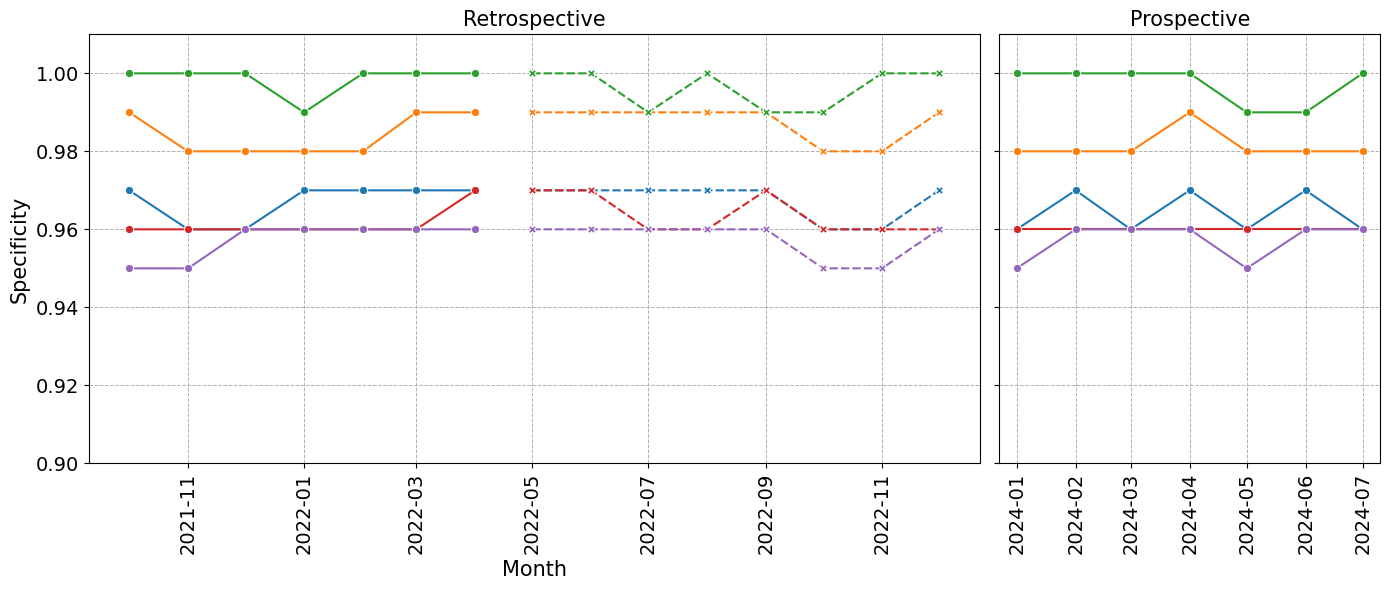

In [7]:
metric = 'Specificity'
clinician = clinician_dat[clinician_dat.Metric == metric]
# Filter the data into two subsets
data_prospective = clinician[clinician['Data Split'] == 'prospective']
data_retrospective = clinician[clinician['Data Split'] != 'prospective']

# Calculate the date range for each subset to determine the width ratio
range_prospective = pd.to_datetime(data_prospective['Month']).max() - pd.to_datetime(data_prospective['Month']).min()
range_retrospective = pd.to_datetime(data_retrospective['Month']).max() - pd.to_datetime(data_retrospective['Month']).min()

# Calculate width ratio
total_range = range_prospective + range_retrospective
width_ratio = [range_retrospective / total_range, range_prospective / total_range]

# Create the subplots with the calculated width ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': width_ratio},sharey=True)

# Plot for non-prospective data (left side)
sns.lineplot(
    data=data_retrospective,
    x='Month',
    y='Value',
    hue='RefTime',
    style='Data Split',
    dashes=True, 
    markers=True, 
    ax=axes[0]
)
axes[0].set_title('Retrospective',fontsize=15)
axes[0].set_xlabel('Month',fontsize=15)
axes[0].set_ylabel(metric,fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14) 
axes[0].tick_params(axis='y', labelsize=14) 
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].get_legend().remove()
# Plot for prospective data (right side)
sns.lineplot(
    data=data_prospective,
    x='Month',
    y='Value',
    hue='RefTime',
    style='Data Split',
    dashes=True, 
    markers=True, 
    ax=axes[1]
)
axes[1].set_title('Prospective',fontsize=15)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='x', rotation=90, labelsize=14) 
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[1].get_legend().remove()
axes[0].set_ylim([0.9,1.01])
# Adjust layout and display the plots 
plt.ylabel(metric,fontsize=16)
plt.tight_layout()
plt.show()


## FN%

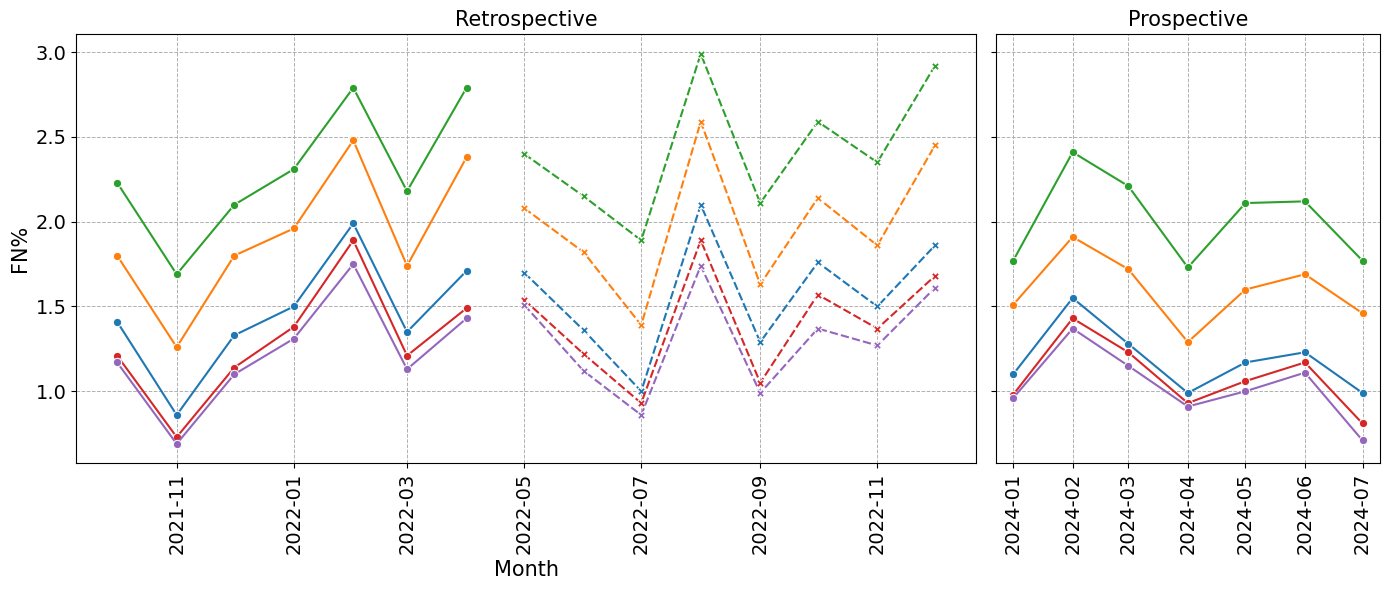

In [8]:
metric = 'FN%'
clinician = clinician_dat[clinician_dat.Metric == metric]
# Filter the data into two subsets
data_prospective = clinician[clinician['Data Split'] == 'prospective']
data_retrospective = clinician[clinician['Data Split'] != 'prospective']

# Calculate the date range for each subset to determine the width ratio
range_prospective = pd.to_datetime(data_prospective['Month']).max() - pd.to_datetime(data_prospective['Month']).min()
range_retrospective = pd.to_datetime(data_retrospective['Month']).max() - pd.to_datetime(data_retrospective['Month']).min()

# Calculate width ratio
total_range = range_prospective + range_retrospective
width_ratio = [range_retrospective / total_range, range_prospective / total_range]

# Create the subplots with the calculated width ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': width_ratio},sharey=True)

# Plot for non-prospective data (left side)
sns.lineplot(
    data=data_retrospective,
    x='Month',
    y='Value',
    hue='RefTime',
    style='Data Split',
    dashes=True, 
    markers=True, 
    ax=axes[0]
)
axes[0].set_title('Retrospective',fontsize=15)
axes[0].set_xlabel('Month',fontsize=15)
axes[0].set_ylabel(metric,fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14) 
axes[0].tick_params(axis='y', labelsize=14) 
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].get_legend().remove()
# Plot for prospective data (right side)
sns.lineplot(
    data=data_prospective,
    x='Month',
    y='Value',
    hue='RefTime',
    style='Data Split',
    dashes=True, 
    markers=True, 
    ax=axes[1]
)
axes[1].set_title('Prospective',fontsize=15)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='x', rotation=90, labelsize=14) 
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[1].get_legend().remove()
#axes[0].set_ylim([0.9,1])
# Adjust layout and display the plots 
plt.ylabel(metric,fontsize=16)
plt.tight_layout()
plt.show()


## FP%

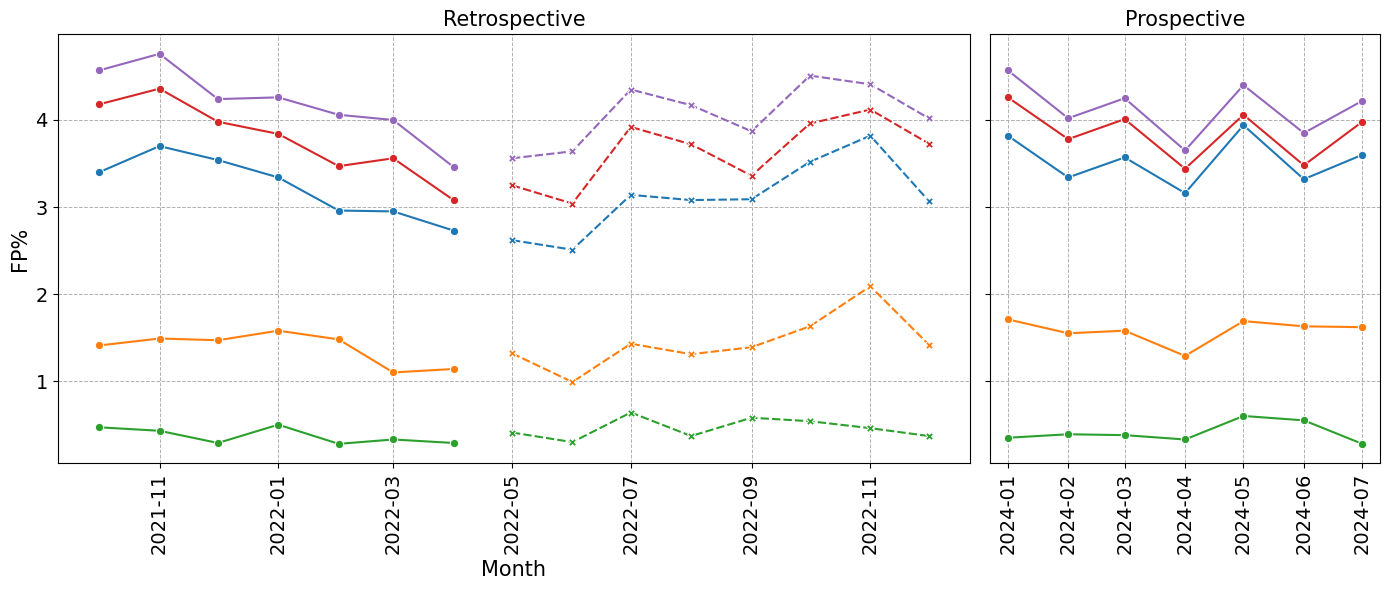

In [9]:
metric = 'FP%'
clinician = clinician_dat[clinician_dat.Metric == metric]
# Filter the data into two subsets
data_prospective = clinician[clinician['Data Split'] == 'prospective']
data_retrospective = clinician[clinician['Data Split'] != 'prospective']

# Calculate the date range for each subset to determine the width ratio
range_prospective = pd.to_datetime(data_prospective['Month']).max() - pd.to_datetime(data_prospective['Month']).min()
range_retrospective = pd.to_datetime(data_retrospective['Month']).max() - pd.to_datetime(data_retrospective['Month']).min()

# Calculate width ratio
total_range = range_prospective + range_retrospective
width_ratio = [range_retrospective / total_range, range_prospective / total_range]

# Create the subplots with the calculated width ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': width_ratio},sharey=True)

# Plot for non-prospective data (left side)
sns.lineplot(
    data=data_retrospective,
    x='Month',
    y='Value',
    hue='RefTime',
    style='Data Split',
    dashes=True, 
    markers=True, 
    ax=axes[0]
)
axes[0].set_title('Retrospective',fontsize=15)
axes[0].set_xlabel('Month',fontsize=15)
axes[0].set_ylabel(metric,fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14) 
axes[0].tick_params(axis='y', labelsize=14) 
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].get_legend().remove()
# Plot for prospective data (right side)
sns.lineplot(
    data=data_prospective,
    x='Month',
    y='Value',
    hue='RefTime',
    style='Data Split',
    dashes=True, 
    markers=True, 
    ax=axes[1]
)
axes[1].set_title('Prospective',fontsize=15)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='x', rotation=90, labelsize=14) 
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[1].get_legend().remove()
#axes[0].set_ylim([0.9,1])
# Adjust layout and display the plots 
plt.ylabel(metric,fontsize=16)
plt.tight_layout()
plt.show()


# clinician v.s. model v.s. msbos

In [2]:
color_dict = {
    'Clinician': 'blue',
    'Model': 'green'
   
}

## customized legend

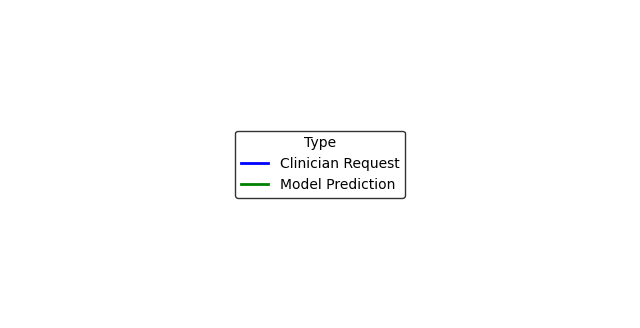

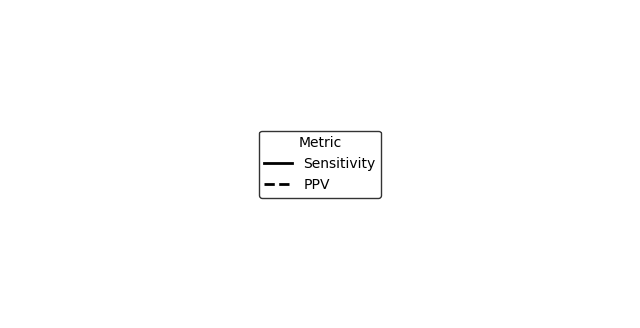

In [3]:
# Define labels
ref_time_labels = [
    'Clinician Request',
    'Model Prediction'
]
metrics_labels = ['Sensitivity', 'PPV']

# Create legend handles for RefTime (lines with different colors)
ref_time_lines = [ 
    plt.Line2D([0], [0], color='blue', lw=2, label=ref_time_labels[0]),
    plt.Line2D([0], [0], color='green', lw=2, label=ref_time_labels[1])
    #plt.Line2D([0], [0], color='red', lw=2, label=ref_time_labels[2]),
]

# Create legend handles for Data Split (lines with different styles)
data_split_lines = [
    plt.Line2D([0], [0], color='black', lw=2, linestyle='-', label=metrics_labels[0]),
    plt.Line2D([0], [0], color='black', lw=2, linestyle='--', label=metrics_labels[1])
]

# Create and save legend for Reference Timepoints
fig1, ax1 = plt.subplots(figsize=(8, 4))
legend1 = ax1.legend(
    handles=ref_time_lines, 
    title='Type', 
    loc='center', 
    frameon=True
)
legend1.get_frame().set_edgecolor('black')
legend1.get_frame().set_linewidth(1)
plt.axis('off')
#plt.savefig('legend_type.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()
plt.close()

# Create and save legend for Metrics
fig2, ax2 = plt.subplots(figsize=(8, 4))
legend2 = ax2.legend(
    handles=data_split_lines, 
    title='Metric', 
    loc='center', 
    frameon=True
)
legend2.get_frame().set_edgecolor('black')
legend2.get_frame().set_linewidth(1)
plt.axis('off')
#plt.savefig('legend_metric.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()
plt.close()


## Edit mo_ds

In [ ]:
with open('mo_ds.pkl', 'rb') as f:
    mo_dict = pickle.load(f)
#for key in list(mo_dict.keys()): 
    #value = mo_dict[key]
    # Print the key and a summary of the value
    #if isinstance(value, pd.DataFrame):
        #print(f"Key: {key}, Value: DataFrame with shape {value.shape}")
    #else:
        #print(f"Key: {key}, Values: {value}")
        

In [34]:
for key in list(mo_dict.keys()):
    if key <= '2024-01':
        mo_dict[key] = 'train'
    elif '2024-02' <= key <= '2024-05':
        mo_dict[key] = 'valid'
    elif key >= '2024-06':
        mo_dict[key] = 'test'
# Add new keys with value 'test'
new_entries = {
    "2024-08": "test",
    "2024-09": "test",
    "2024-10": "test",
    "2024-11": "test",
    "2024-12": "test",
    "2023-01": "train",
    "2023-02": "train",
    "2023-03": "train",
    "2023-04": "train",
    "2023-05": "train",
    "2023-06": "train",
    "2023-07": "train",
    "2023-08": "train",
    "2023-09": "train",
    "2023-10": "train",
    "2023-11": "train",
    "2023-12": "train"
}
mo_dict.update(new_entries)
print(mo_dict)

{'2016-01': 'train', '2016-02': 'train', '2016-05': 'train', '2016-03': 'train', '2016-04': 'train', '2016-10': 'train', '2017-02': 'train', '2016-06': 'train', '2016-07': 'train', '2016-08': 'train', '2016-09': 'train', '2016-11': 'train', '2016-12': 'train', '2017-01': 'train', '2017-03': 'train', '2017-04': 'train', '2017-05': 'train', '2017-06': 'train', '2017-07': 'train', '2017-08': 'train', '2017-09': 'train', '2017-10': 'train', '2017-11': 'train', '2017-12': 'train', '2018-01': 'train', '2018-02': 'train', '2018-03': 'train', '2018-04': 'train', '2018-05': 'train', '2018-06': 'train', '2018-07': 'train', '2018-08': 'train', '2018-09': 'train', '2018-10': 'train', '2018-11': 'train', '2018-12': 'train', '2019-01': 'train', '2019-02': 'train', '2019-03': 'train', '2019-04': 'train', '2019-05': 'train', '2019-06': 'train', '2019-10': 'train', '2019-12': 'train', '2019-07': 'train', '2019-08': 'train', '2020-03': 'train', '2019-09': 'train', '2019-11': 'train', '2020-01': 'train',

## prbc

In [12]:
clinician_dat = pd.read_csv('timetrend_all_blood_products_May5.csv')
clinician_dat = clinician_dat.query(
    "RefTime in ['req_any_before_anes', 'req_any_before_1hr_anes', 'req_any_before_1d_anes', 'req_after_inroom_30m','req_after_inroom_1h'] \
    and `Data Split` != 'train'") 
clinician_dat['Month'] = pd.to_datetime(clinician_dat['Month'])
clinician = clinician_dat[clinician_dat.RefTime=='req_any_before_anes']
# to read last score binarized result in prospective
#prosp_model = pd.read_csv('prospective_tp_score.csv') 
#prosp_model = prosp_model[prosp_model.RefTime=='last_score']
msbos = pd.read_csv('msbos_prbc.csv')
msbos = msbos[(msbos.RefTime=='prbc')&(msbos['Data Split'] != 'train')]
msbos['Month'] = pd.to_datetime(msbos['Month'])
# 'model_retro' would include prospective depending on how it's saved in hipac_model.py
model_retro = pd.read_csv('../monthly_metrics_multi_wei_full_multi_newThres.csv').rename(columns={'Spec':'RefTime'})
#model_retro['Data Split'] = model_retro['Month'].map(mo_dict)
model_retro.rename(columns={'Split': 'Data Split'}, inplace=True)
model_retro['Month']  = pd.to_datetime(model_retro['Month'])
model_retro = model_retro[(model_retro.Type== 'Model')] # &(model_retro['Data Split'] != 'train')]
# stack model & clinician orders vertically
combine_dat = pd.concat([model_retro,clinician #msbos
                        ],axis=0,ignore_index=True)
combine_dat = combine_dat[combine_dat.Month >= '2016-01']
#combine_dat['Month'] = pd.to_datetime(combine_dat['Month'])#.dt.to_timestamp('s').dt.strftime("%Y-%M")
combine_dat = combine_dat[~combine_dat.Month.isnull()]
combine_dat = combine_dat[~combine_dat['Data Split'].isna()]
#combine_dat.Month.unique()

## plot_metric_old

In [ ]:
# Define the plotting function
def plot_metric_old(combine_dat, color_dict, threshold, blood_product):
    metrics = ['Sensitivity', 'PPV']
    combine = combine_dat[(combine_dat['Blood Product'] == blood_product)].dropna(subset='Month')
    
    # Filter data into validation and test subsets
    data_splits = ['valid', 'test']
    data_dict = {split: combine[combine['Data Split'] == split] for split in data_splits}

    # Calculate the date range for each subset
    ranges = {split: pd.to_datetime(data['Month']).max() - pd.to_datetime(data['Month']).min() 
             for split, data in data_dict.items()}
    total_range = sum(ranges.values(), pd.Timedelta(0))
    width_ratio = [ranges[split] / total_range for split in data_splits]

    # Create the figure
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # Create legend handles
    ref_time_lines = [
        plt.Line2D([0], [0], color='blue', lw=2, label='Clinician Request'),
        plt.Line2D([0], [0], color='green', lw=2, label='Model Prediction')
    ]
    
    data_split_lines = [
        plt.Line2D([0], [0], color='black', lw=2, linestyle='-', label='Sensitivity'),
        plt.Line2D([0], [0], color='black', lw=2, linestyle='--', label='PPV')
    ]

    for i, split in enumerate(data_splits):
        for metric in metrics:
            line_style = [] if metric == 'Sensitivity' else [5, 5]
            sns.lineplot(
                data=data_dict[split][data_dict[split]['Metric'] == metric],
                x='Month',
                y='Value',
                hue='Type',
                style='Metric',
                dashes={metric: line_style},
                markers=True,
                palette=color_dict,
                errorbar=None,
                ax=axes[i]
            )
        axes[i].set_title(split.capitalize(), fontsize=15)
        axes[i].set_xlabel('Month', fontsize=15)
        axes[i].tick_params(axis='x', rotation=90, labelsize=14)
        axes[i].grid(True, which='both', linestyle='--', linewidth=0.7)
        axes[i].get_legend().remove()
        
        axes[i].xaxis.set_major_locator(mdates.MonthLocator())
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Set specific x-range for all plots
    axes[0].set_xlim([pd.to_datetime('2024-01'), pd.to_datetime('2024-04')])
    axes[1].set_xlim([pd.to_datetime('2024-05'), pd.to_datetime('2024-10')])

    # Set common y-label and ylim
    axes[0].set_ylabel('Value', fontsize=15)
    axes[0].set_ylim([0, 1])

    # Add legends to the first subplot (you can adjust the position as needed)
    legend1 = axes[0].legend(handles=ref_time_lines, title='Type', 
                            loc='upper left', bbox_to_anchor=(0.02, 0.98),
                            frameon=True)
    axes[0].add_artist(legend1)  # This ensures both legends appear
    legend2 = axes[0].legend(handles=data_split_lines, title='Metric', 
                            loc='upper left', bbox_to_anchor=(0.02, 0.75),
                            frameon=True)
    
    # Configure legend appearances
    for legend in [legend1, legend2]:
        legend.get_frame().set_edgecolor('black')
        legend.get_frame().set_linewidth(1)

    plt.tight_layout()
    
    # Save the plot
    filename = f"sensitivity_ppv_threshold_{threshold}_{blood_product}.png"
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()

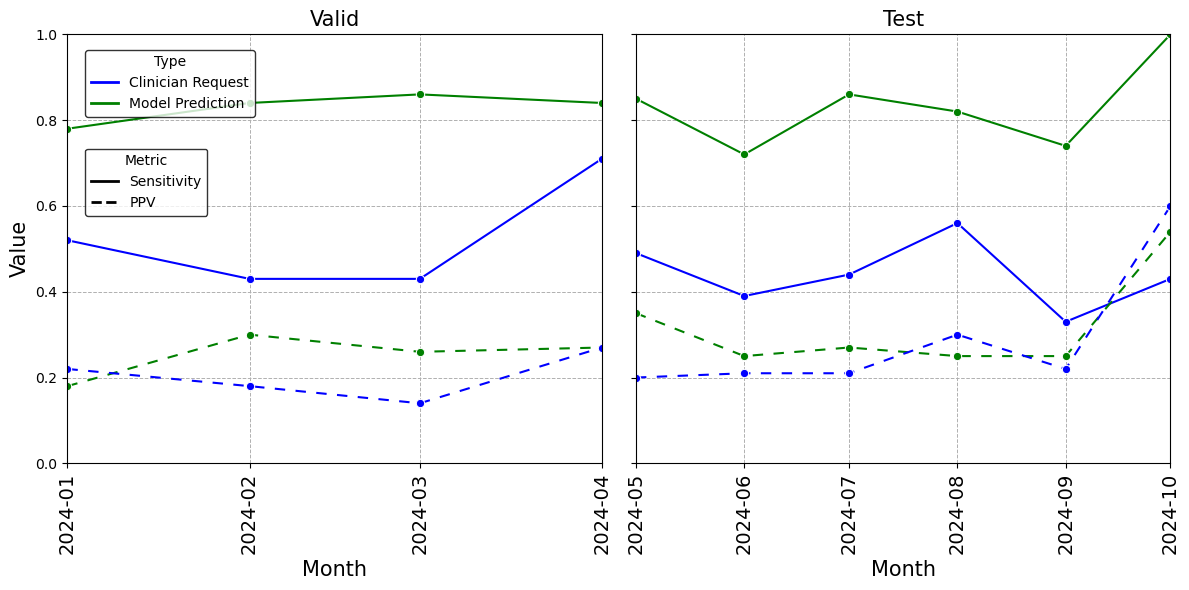

In [10]:
# Example usage
threshold = 'Colin'  # sensitivity goal, not actual probability threshold
blood_product = 'platelet'  # example blood product category
plot_metric_old(combine_dat, color_dict, threshold, blood_product)

## Combined 3 plots

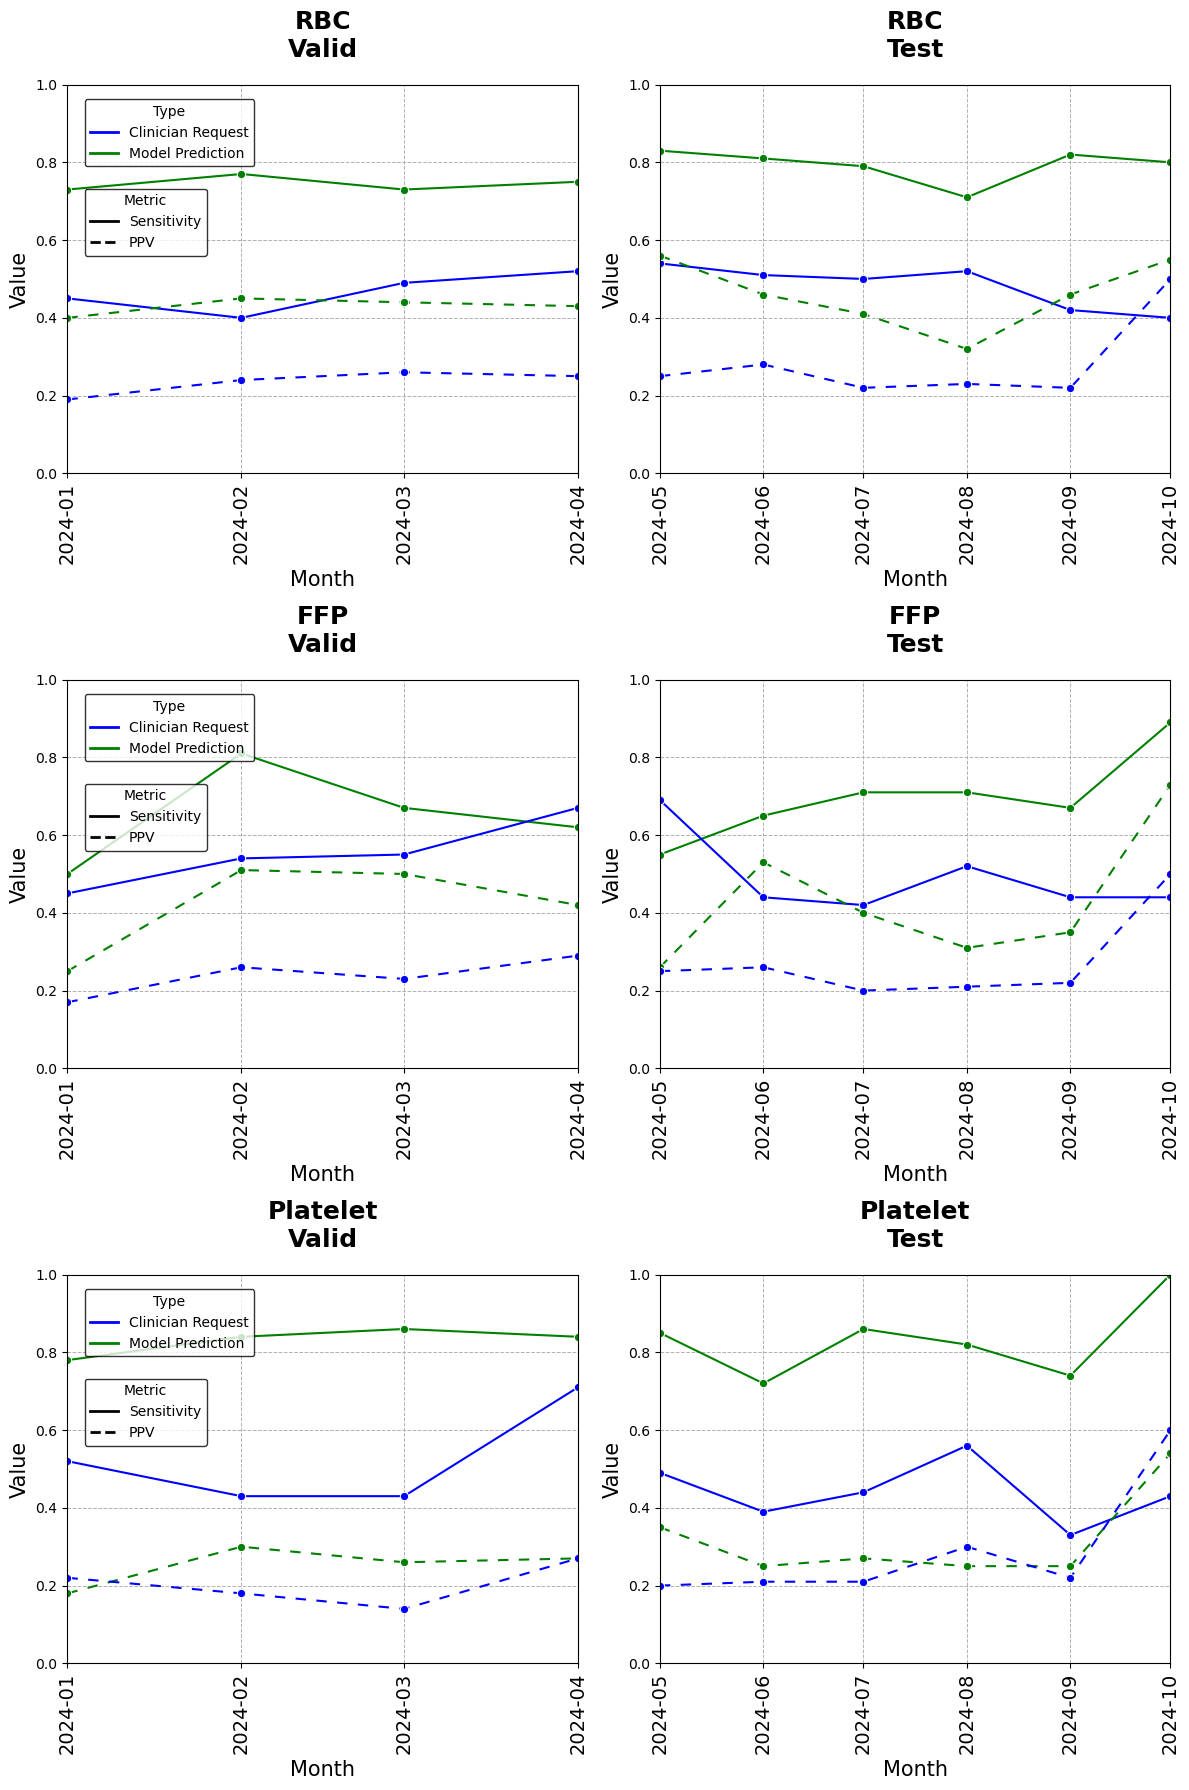

In [ ]:
def plot_metric(combine_dat, color_dict, threshold, blood_product, main_title, ax1, ax2):
    metrics = ['Sensitivity', 'PPV']
    combine = combine_dat[(combine_dat['Blood Product'] == blood_product)].dropna(subset='Month')
    
    # Filter data into validation and test subsets
    data_splits = ['valid', 'test']
    data_dict = {split: combine[combine['Data Split'] == split] for split in data_splits}

    axes = [ax1, ax2]

    # Create legend handles
    ref_time_lines = [
        plt.Line2D([0], [0], color='blue', lw=2, label='Clinician Request'),
        plt.Line2D([0], [0], color='green', lw=2, label='Model Prediction')
    ]
    
    data_split_lines = [
        plt.Line2D([0], [0], color='black', lw=2, linestyle='-', label='Sensitivity'),
        plt.Line2D([0], [0], color='black', lw=2, linestyle='--', label='PPV')
    ]

    for i, split in enumerate(data_splits):
        for metric in metrics:
            line_style = [] if metric == 'Sensitivity' else [5, 5]
            sns.lineplot(
                data=data_dict[split][data_dict[split]['Metric'] == metric],
                x='Month',
                y='Value',
                hue='Type',
                style='Metric',
                dashes={metric: line_style},
                markers=True,
                palette=color_dict,
                errorbar=None,
                ax=axes[i]
            )
        # Set title with larger font and bold
        axes[i].set_title(f"{main_title}\n{split.capitalize()}", 
                         fontsize=18, 
                         pad=20, 
                         weight='bold')
        
        axes[i].set_xlabel('Month', fontsize=15)
        axes[i].tick_params(axis='x', rotation=90, labelsize=14)
        axes[i].grid(True, which='both', linestyle='--', linewidth=0.7)
        axes[i].get_legend().remove()
        
        # Set y-axis label with consistent font size
        axes[i].set_ylabel('Value', fontsize=15)
        
        axes[i].xaxis.set_major_locator(mdates.MonthLocator())
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Set specific x-range for all plots
    axes[0].set_xlim([pd.to_datetime('2024-01'), pd.to_datetime('2024-04')])
    axes[1].set_xlim([pd.to_datetime('2024-05'), pd.to_datetime('2024-10')])

    # Set common ylim
    axes[0].set_ylim([0, 1])
    axes[1].set_ylim([0, 1])

    # Add legends to the first subplot
    legend1 = axes[0].legend(handles=ref_time_lines, title='Type', 
                            loc='upper left', bbox_to_anchor=(0.02, 0.98),
                            frameon=True)
    axes[0].add_artist(legend1)
    legend2 = axes[0].legend(handles=data_split_lines, title='Metric', 
                            loc='upper left', bbox_to_anchor=(0.02, 0.75),
                            frameon=True)
    
    # Configure legend appearances
    for legend in [legend1, legend2]:
        legend.get_frame().set_edgecolor('black')
        legend.get_frame().set_linewidth(1)

# Create combined figure for all blood products
threshold = 'Colin'
blood_products = ['prbc', 'ffp', 'platelet']
main_titles = ['RBC', 'FFP', 'Platelet']

# Create the combined figure
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Create plots for each blood product
for idx, (blood_product, main_title) in enumerate(zip(blood_products, main_titles)):
    plot_metric(combine_dat, color_dict, threshold, blood_product, main_title, 
                axes[idx, 0], axes[idx, 1])

plt.tight_layout()
plt.savefig(f'combined_metrics_threshold_{threshold}.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
metric = 'PPV'
combine = combine_dat[combine_dat.Metric == metric].dropna(subset='Month')
# Filter the data into two subsets
data_train = combine[combine['Data Split'] == 'train']
data_valid = combine[combine['Data Split'] == 'valid']
data_test = combine[combine['Data Split'] == 'test']

# Calculate the date range for each subset to determine the width ratio
range_train = pd.to_datetime(data_train['Month']).max() - pd.to_datetime(data_train['Month']).min()
range_valid = pd.to_datetime(data_valid['Month']).max() - pd.to_datetime(data_valid['Month']).min()
range_test = pd.to_datetime(data_test['Month']).max() - pd.to_datetime(data_test['Month']).min()

# Calculate width ratio
total_range = range_train + range_valid + range_test
width_ratio = [range_train / total_range, range_valid / total_range, range_test / total_range]

# Create the subplots with the calculated width ratio
fig, axes = plt.subplots(1, 3, figsize=(14, 6), gridspec_kw={'width_ratios': width_ratio},sharey=True)

# Plot for train data (left side)
sns.lineplot(
    data=data_train,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    dashes=True, 
    markers=True, 
    palette = color_dict,
    errorbar=None,
    ax=axes[0]
)
axes[0].set_title('Train',fontsize=15)
axes[0].set_xlabel('Month',fontsize=15)
axes[0].set_ylabel(metric,fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14) 
axes[0].tick_params(axis='y', labelsize=14) 
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].get_legend().remove()
# Plot for valid data (middle)
sns.lineplot(
    data=data_valid,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    palette = color_dict,
    dashes=True, 
    markers=True, 
    errorbar=None,
    ax=axes[1]
)
axes[1].set_title('Valid',fontsize=15)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='x', rotation=90, labelsize=14) 
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[1].get_legend().remove()
axes[1].set_xlabel('Month',fontsize=15)
axes[0].set_ylim([0,0.75])
# Convert date strings to datetime objects
start_date = pd.to_datetime('2024-01')
end_date = pd.to_datetime('2024-06')

# Set xlim for the second plot
axes[1].set_xlim([start_date, end_date])

# Plot for test data (right side)
sns.lineplot(
    data=data_test,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    palette = color_dict,
    dashes=True, 
    markers=True, 
    errorbar=None,
    ax=axes[2]
)
axes[2].set_title('Test',fontsize=15)
axes[2].set_xlabel(None)
axes[2].tick_params(axis='x', rotation=90, labelsize=14) 
axes[2].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[2].get_legend().remove()
axes[0].set_ylim([0,0.85])
axes[2].set_xlabel('Month',fontsize=15)
# Convert date strings to datetime objects
start_date = pd.to_datetime('2024-05')
end_date = pd.to_datetime('2024-12')

# Set xlim for the second plot
axes[2].set_xlim([start_date, end_date])
# Adjust layout and display the plots 
plt.ylabel(metric,fontsize=16)
plt.tight_layout()
# Save the figure to a file
#plt.savefig('prbc_ppv_wei_multi_newSplit_newDate.png') 
plt.show()

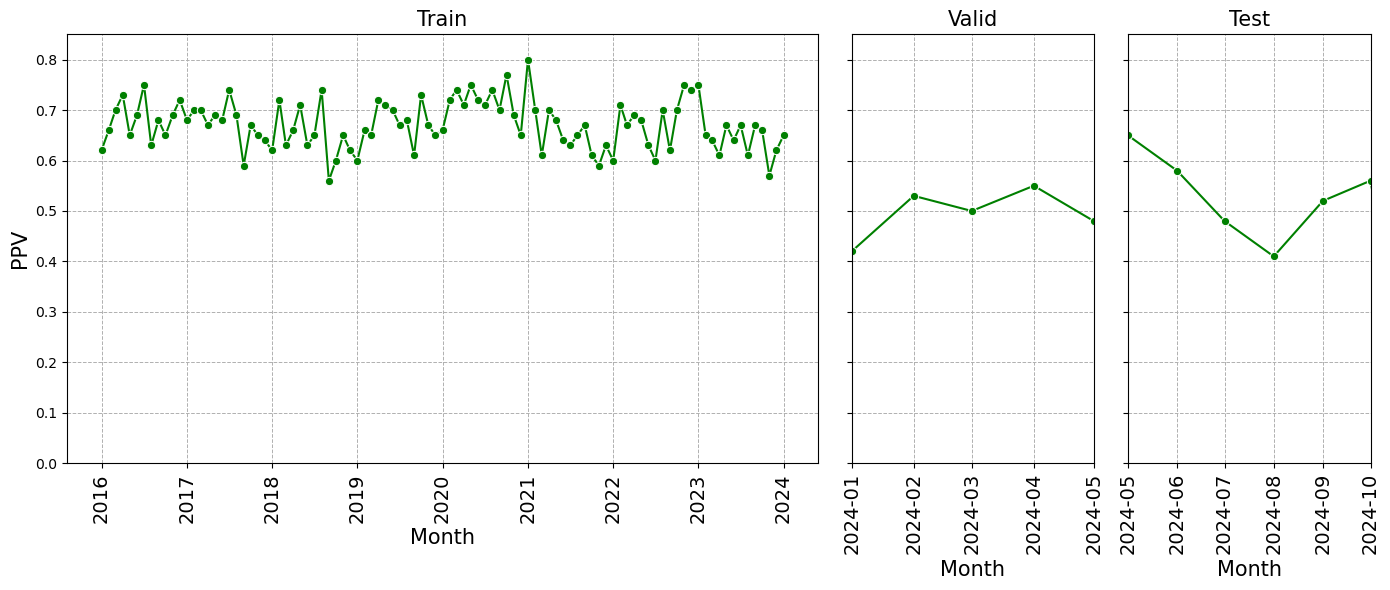

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates



In [ ]:
total_range = range_train + range_valid + range_test

# Debugging: Print the calculated ranges and total range
print(f"Range Train: {range_train}")
print(f"Range Valid: {range_valid}")
print(f"Range Test: {range_test}")
print(f"Total Range: {total_range}")

Range Train: 0
Range Valid: 4
Range Test: 7
Total Range: 11


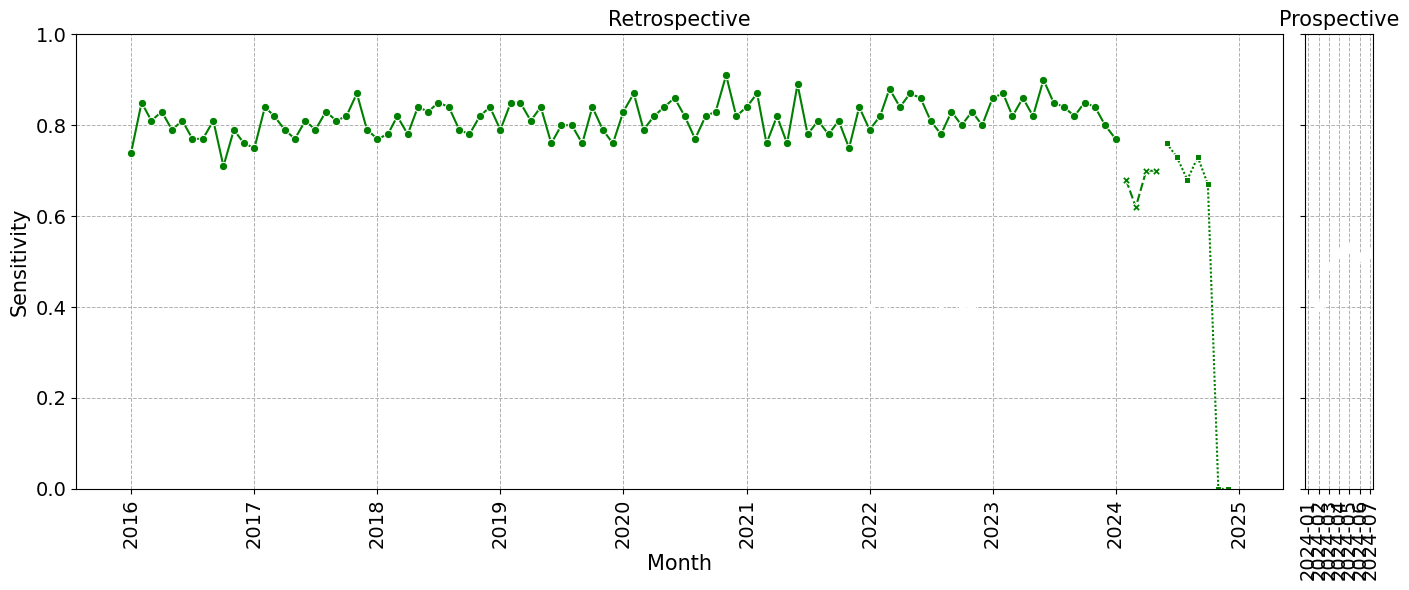

In [49]:
metric = 'Sensitivity'
combine = combine_dat[combine_dat.Metric == metric].dropna(subset='Month') 
# Filter the data into two subsets
data_prospective = combine[combine['Data Split'] == 'prospective']
data_retrospective = combine[combine['Data Split'] != 'prospective']

# Calculate the date range for each subset to determine the width ratio
range_prospective = pd.to_datetime(data_prospective['Month']).max() - pd.to_datetime(data_prospective['Month']).min()
range_retrospective = pd.to_datetime(data_retrospective['Month']).max() - pd.to_datetime(data_retrospective['Month']).min()

# Calculate width ratio
total_range = range_prospective + range_retrospective
width_ratio = [range_retrospective / total_range, range_prospective / total_range]

# Create the subplots with the calculated width ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': width_ratio},sharey=True)

# Plot for non-prospective data (left side)
sns.lineplot(
    data=data_retrospective,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    dashes=True, 
    markers=True, 
    palette = color_dict,
    ax=axes[0]
)
axes[0].set_title('Retrospective',fontsize=15)
axes[0].set_xlabel('Month',fontsize=15)
axes[0].set_ylabel(metric,fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14) 
axes[0].tick_params(axis='y', labelsize=14) 
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].set_ylim([0,1])
axes[0].get_legend().remove()
# Plot for prospective data (right side)
sns.lineplot(
    data=data_prospective,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    palette = color_dict,
    dashes=True, 
    markers=True, 
    ax=axes[1]
)
axes[1].set_title('Prospective',fontsize=15)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='x', rotation=90, labelsize=14) 
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[1].get_legend().remove()

# Adjust layout and display the plots 
plt.ylabel(metric,fontsize=16)
plt.tight_layout()
# Save the figure to a file
#plt.savefig('prbc_sens_wei_multi_newDates.png') 

plt.show()



## race eth prbc

In [160]:
clinician_dat = pd.read_csv('timetrend_prbc_req_before_added.csv')
clinician_dat = clinician_dat.query(
    "RefTime in ['req_any_before_anes', 'req_any_before_1hr_anes', 'req_any_before_1d_anes', 'req_after_inroom_30m','req_after_inroom_1h'] \
    and `Data Split` != 'train'") 
clinician_dat['Month'] = pd.to_datetime(clinician_dat['Month'])
clinician = clinician_dat[clinician_dat.RefTime=='req_any_before_anes']
# to read last score binarized result in prospective
#prosp_model = pd.read_csv('prospective_tp_score.csv') 
#prosp_model = prosp_model[prosp_model.RefTime=='last_score']
msbos = pd.read_csv('msbos_prbc.csv')
msbos = msbos[(msbos.RefTime=='PRBC')&(msbos['Data Split'] != 'train')]
msbos['Month'] = pd.to_datetime(msbos['Month'])
# 'model_retro' would include prospective depending on how it's saved in hipac_model.py
model_retro = pd.read_csv('../monthly_metrics_olddat_pt74_full_re-specific.csv').rename(columns={'Spec':'RefTime'})
with open('mo_ds.pkl', 'rb') as f:
    mo_dict = pickle.load(f)
model_retro['Data Split'] = model_retro['Month'].map(mo_dict)
model_retro['Month']  = pd.to_datetime(model_retro['Month'])
model_retro = model_retro[(model_retro.Type== 'Model')&(model_retro['Data Split'] != 'train')]
combine_dat = pd.concat([clinician,model_retro,msbos],axis=0,ignore_index=True)
combine_dat = combine_dat[~combine_dat['Data Split'].isna()]
combine_dat = combine_dat[~combine_dat.Month.isnull()]
combine_dat.Month.unique()

<DatetimeArray>
['2021-10-01 00:00:00', '2022-02-01 00:00:00', '2021-11-01 00:00:00',
 '2021-12-01 00:00:00', '2022-01-01 00:00:00', '2022-03-01 00:00:00',
 '2022-04-01 00:00:00', '2022-05-01 00:00:00', '2022-06-01 00:00:00',
 '2024-02-01 00:00:00', '2022-09-01 00:00:00', '2022-07-01 00:00:00',
 '2022-08-01 00:00:00', '2022-11-01 00:00:00', '2022-10-01 00:00:00',
 '2022-12-01 00:00:00', '2024-01-01 00:00:00', '2024-03-01 00:00:00',
 '2024-04-01 00:00:00', '2024-05-01 00:00:00', '2024-06-01 00:00:00',
 '2024-07-01 00:00:00']
Length: 22, dtype: datetime64[ns]

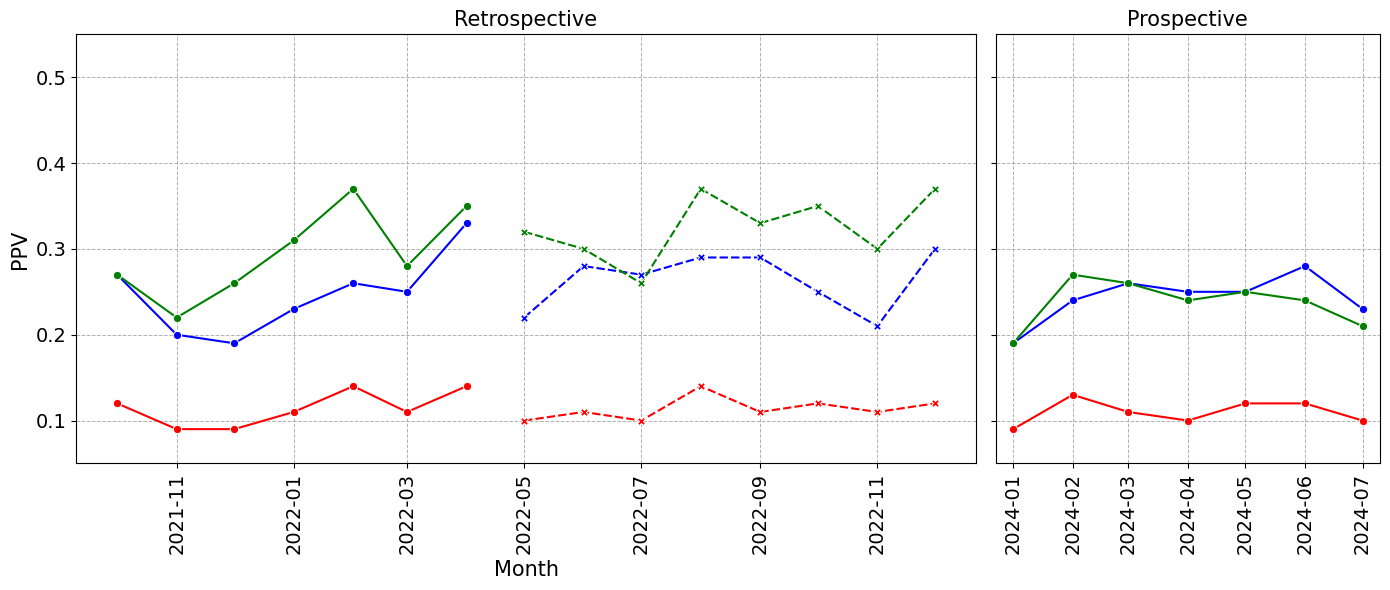

In [161]:
metric = 'PPV'
combine = combine_dat[combine_dat.Metric == metric].dropna(subset='Month')
# Filter the data into two subsets
data_prospective = combine[combine['Data Split'] == 'prospective']
data_retrospective = combine[combine['Data Split'] != 'prospective']

# Calculate the date range for each subset to determine the width ratio
range_prospective = pd.to_datetime(data_prospective['Month']).max() - pd.to_datetime(data_prospective['Month']).min()
range_retrospective = pd.to_datetime(data_retrospective['Month']).max() - pd.to_datetime(data_retrospective['Month']).min()

# Calculate width ratio
total_range = range_prospective + range_retrospective
width_ratio = [range_retrospective / total_range, range_prospective / total_range]

# Create the subplots with the calculated width ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': width_ratio},sharey=True)

# Plot for non-prospective data (left side)
sns.lineplot(
    data=data_retrospective,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    dashes=True, 
    markers=True, 
    palette = color_dict,
    errorbar=None,
    ax=axes[0]
)
axes[0].set_title('Retrospective',fontsize=15)
axes[0].set_xlabel('Month',fontsize=15)
axes[0].set_ylabel(metric,fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14) 
axes[0].tick_params(axis='y', labelsize=14) 
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].get_legend().remove()
# Plot for prospective data (right side)
sns.lineplot(
    data=data_prospective,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    palette = color_dict,
    dashes=True, 
    markers=True, 
    errorbar=None,
    ax=axes[1]
)
axes[1].set_title('Prospective',fontsize=15)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='x', rotation=90, labelsize=14) 
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[1].get_legend().remove()
axes[0].set_ylim([0.05,0.55])
# Adjust layout and display the plots 
plt.ylabel(metric,fontsize=16)
plt.tight_layout()
plt.show()


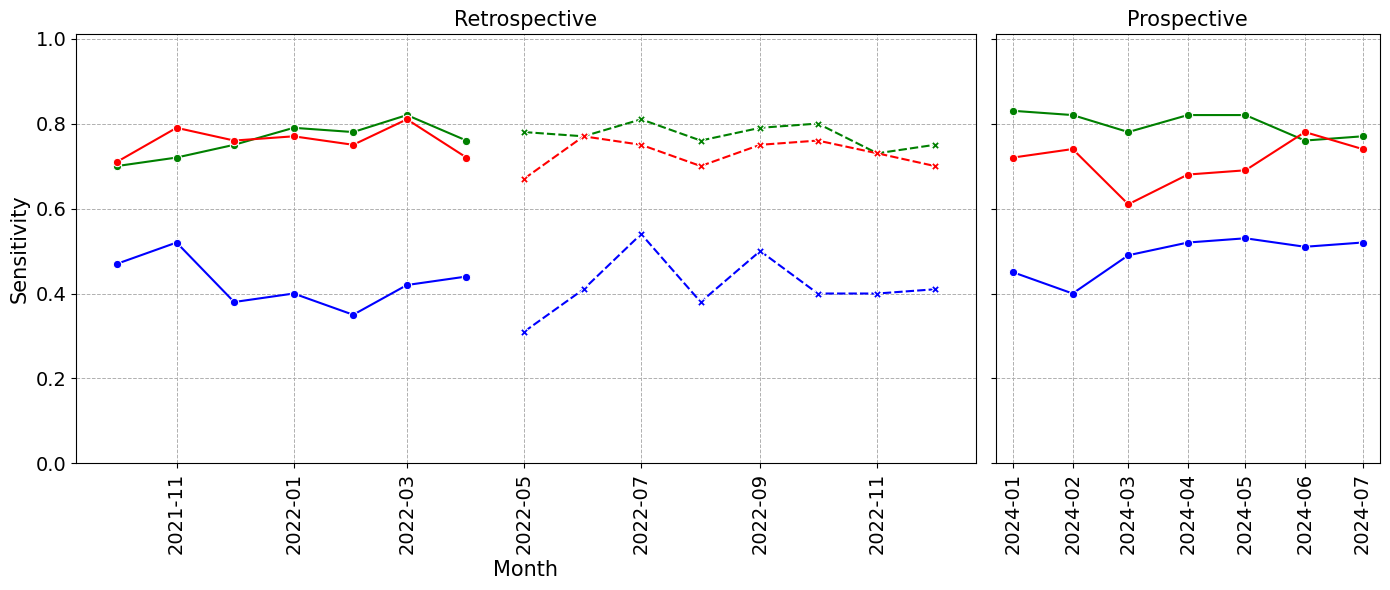

In [156]:
metric = 'Sensitivity'
combine = combine_dat[combine_dat.Metric == metric].dropna(subset='Month')
# Filter the data into two subsets
data_prospective = combine[combine['Data Split'] == 'prospective']
data_retrospective = combine[combine['Data Split'] != 'prospective']

# Calculate the date range for each subset to determine the width ratio
range_prospective = pd.to_datetime(data_prospective['Month']).max() - pd.to_datetime(data_prospective['Month']).min()
range_retrospective = pd.to_datetime(data_retrospective['Month']).max() - pd.to_datetime(data_retrospective['Month']).min()

# Calculate width ratio
total_range = range_prospective + range_retrospective
width_ratio = [range_retrospective / total_range, range_prospective / total_range]

# Create the subplots with the calculated width ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': width_ratio},sharey=True)

# Plot for non-prospective data (left side)
sns.lineplot(
    data=data_retrospective,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    dashes=True, 
    markers=True, 
    palette = color_dict,
    errorbar=None,
    ax=axes[0]
)
axes[0].set_title('Retrospective',fontsize=15)
axes[0].set_xlabel('Month',fontsize=15)
axes[0].set_ylabel(metric,fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14) 
axes[0].tick_params(axis='y', labelsize=14) 
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].get_legend().remove()
# Plot for prospective data (right side)
sns.lineplot(
    data=data_prospective,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    palette = color_dict,
    dashes=True, 
    markers=True, 
    errorbar=None,
    ax=axes[1]
)
axes[1].set_title('Prospective',fontsize=15)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='x', rotation=90, labelsize=14) 
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[1].get_legend().remove()
axes[0].set_ylim([0.,1.01])
# Adjust layout and display the plots 
plt.ylabel(metric,fontsize=16)
plt.tight_layout()
plt.show()


## ts

In [162]:
with open('mo_ds.pkl', 'rb') as f:
    mo_dict = pickle.load(f)
clinician_dat = pd.read_csv('timetrend_ts.csv')
clinician_dat['Data Split'] = clinician_dat['Month'].map(mo_dict)
clinician_dat = clinician_dat[(clinician_dat.RefTime == 'ts_any')&(clinician_dat['Data Split']!='train')]
clinician_dat['Month'] = pd.to_datetime(clinician_dat['Month'])
msbos = pd.read_csv('msbos_prbc.csv')
msbos = msbos[(msbos.RefTime=='TS')&(msbos['Data Split'] != 'train')]
msbos['Month'] = pd.to_datetime(msbos['Month'])
model_retro = pd.read_csv('../monthly_metrics_olddat_pt9_full.csv').rename(columns={'Spec':'RefTime'})
#prosp_model = pd.read_csv('prospective_tp_score_pt9.csv') 
#prosp_model = prosp_model[prosp_model.RefTime=='last_score']
model_retro['Data Split'] = model_retro['Month'].map(mo_dict)
model_retro['Month']  = pd.to_datetime(model_retro['Month'])
model_retro = model_retro[(model_retro.Type== 'Model')&(model_retro['Data Split'] != 'train')]
#model_retro['Month'] = pd.to_datetime(model_retro['Month'])
combine_dat = pd.concat([clinician_dat,model_retro,msbos],axis=0,ignore_index=True)
combine_dat = combine_dat[combine_dat.Month != '2015-12']
combine_dat = combine_dat[~combine_dat['Data Split'].isna()]
combine_dat = combine_dat[~combine_dat.Month.isnull()]
combine_dat.Month.unique()


<DatetimeArray>
['2022-09-01 00:00:00', '2024-01-01 00:00:00', '2022-11-01 00:00:00',
 '2022-04-01 00:00:00', '2022-12-01 00:00:00', '2024-04-01 00:00:00',
 '2024-07-01 00:00:00', '2024-03-01 00:00:00', '2022-08-01 00:00:00',
 '2022-07-01 00:00:00', '2024-05-01 00:00:00', '2021-10-01 00:00:00',
 '2022-03-01 00:00:00', '2021-11-01 00:00:00', '2022-01-01 00:00:00',
 '2022-05-01 00:00:00', '2022-06-01 00:00:00', '2024-06-01 00:00:00',
 '2024-02-01 00:00:00', '2022-10-01 00:00:00', '2022-02-01 00:00:00',
 '2021-12-01 00:00:00']
Length: 22, dtype: datetime64[ns]

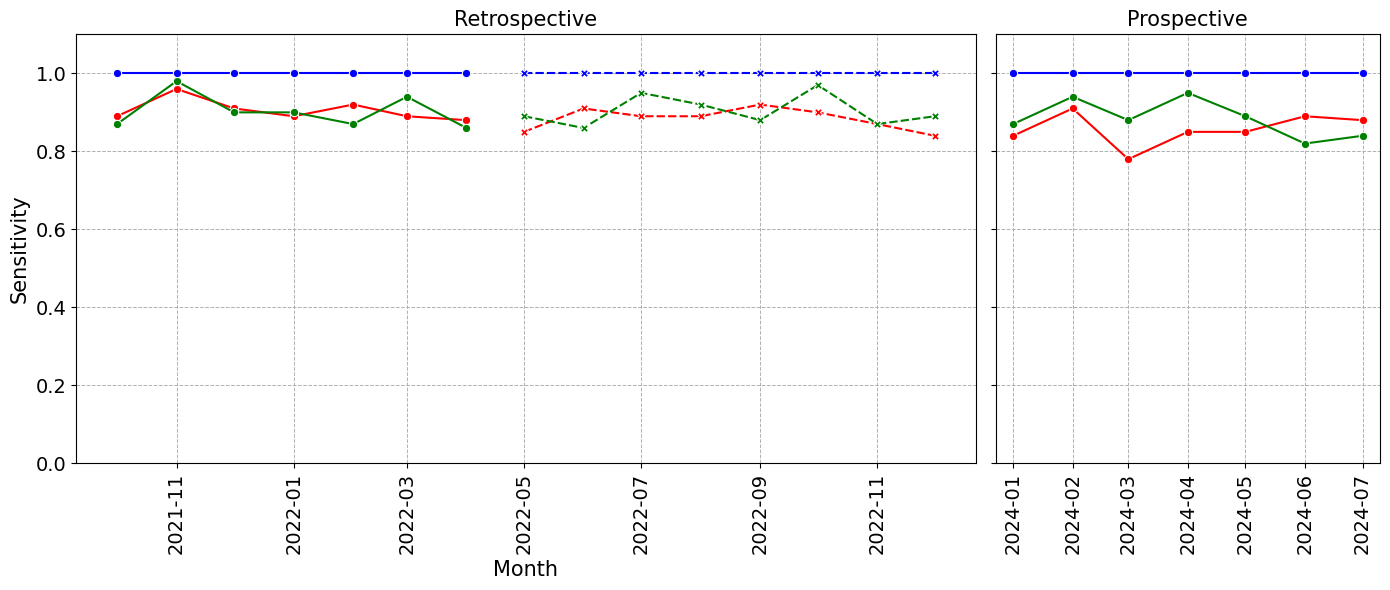

In [163]:
metric = 'Sensitivity'
combine = combine_dat[combine_dat.Metric == metric].dropna(subset='Month').sort_values(by='Month',ascending=True)
# Filter the data into two subsets
data_prospective = combine[combine['Data Split'] == 'prospective']
data_retrospective = combine[combine['Data Split'] != 'prospective']

# Calculate the date range for each subset to determine the width ratio
range_prospective = pd.to_datetime(data_prospective['Month']).max() - pd.to_datetime(data_prospective['Month']).min()
range_retrospective = pd.to_datetime(data_retrospective['Month']).max() - pd.to_datetime(data_retrospective['Month']).min()

# Calculate width ratio
total_range = range_prospective + range_retrospective
width_ratio = [range_retrospective / total_range, range_prospective / total_range]

# Create the subplots with the calculated width ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': width_ratio},sharey=True)

# Plot for non-prospective data (left side)
sns.lineplot(
    data=data_retrospective,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    dashes=True, 
    markers=True, 
    palette = color_dict,
    errorbar = None,
    ax=axes[0]
)
axes[0].set_title('Retrospective',fontsize=15)
axes[0].set_xlabel('Month',fontsize=15)
axes[0].set_ylabel(metric,fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14) 
axes[0].tick_params(axis='y', labelsize=14) 
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].set_ylim([0,1.1])
axes[0].get_legend().remove()
# Plot for prospective data (right side)
sns.lineplot(
    data=data_prospective,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    palette = color_dict,
    dashes=True, 
    markers=True, 
    errorbar=None,
    ax=axes[1]
)
axes[1].set_title('Prospective',fontsize=15)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='x', rotation=90, labelsize=14) 
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[1].get_legend().remove()

# Adjust layout and display the plots 
plt.ylabel(metric,fontsize=16)
plt.tight_layout()
plt.show()


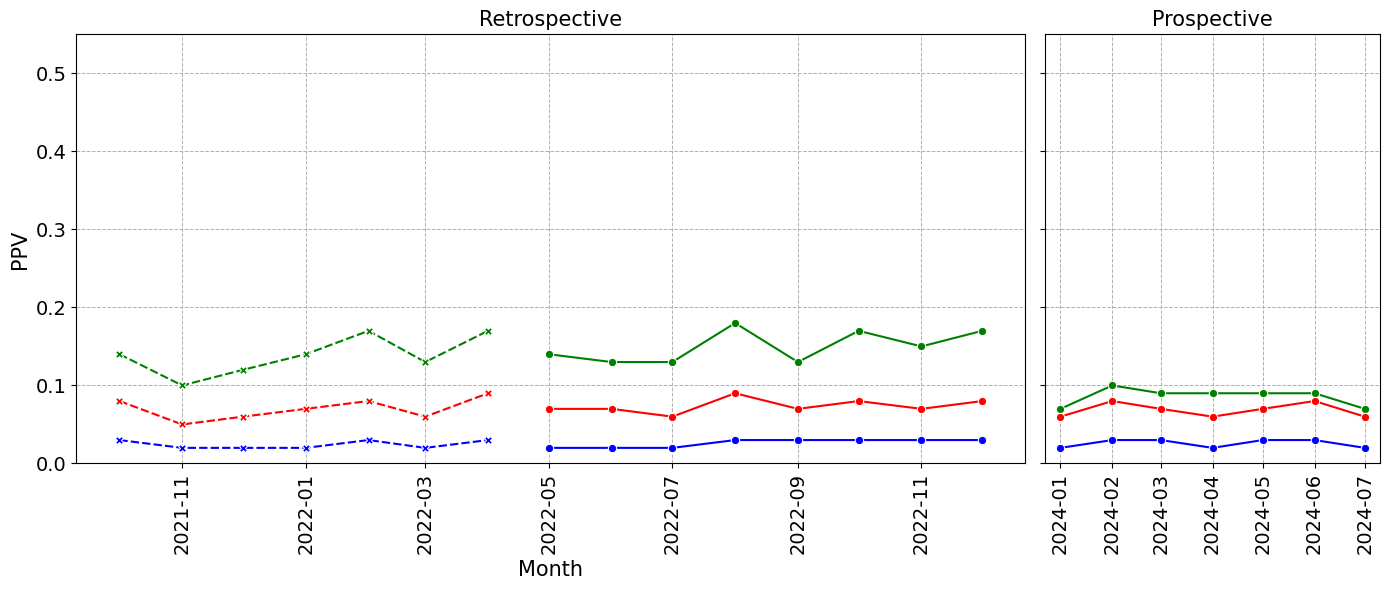

In [134]:
metric = 'PPV'
combine = combine_dat[combine_dat.Metric == metric].dropna(subset='Month')
# Filter the data into two subsets
data_prospective = combine[combine['Data Split'] == 'prospective']
data_retrospective = combine[combine['Data Split'] != 'prospective']

# Calculate the date range for each subset to determine the width ratio
range_prospective = pd.to_datetime(data_prospective['Month']).max() - pd.to_datetime(data_prospective['Month']).min()
range_retrospective = pd.to_datetime(data_retrospective['Month']).max() - pd.to_datetime(data_retrospective['Month']).min()

# Calculate width ratio
total_range = range_prospective + range_retrospective
width_ratio = [range_retrospective / total_range, range_prospective / total_range]

# Create the subplots with the calculated width ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': width_ratio},sharey=True)

# Plot for non-prospective data (left side)
sns.lineplot(
    data=data_retrospective,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    dashes=True, 
    markers=True, 
    palette = color_dict,
    ax=axes[0]
)
axes[0].set_title('Retrospective',fontsize=15)
axes[0].set_xlabel('Month',fontsize=15)
axes[0].set_ylabel(metric,fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14) 
axes[0].tick_params(axis='y', labelsize=14) 
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].get_legend().remove()
# Plot for prospective data (right side)
sns.lineplot(
    data=data_prospective,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    palette = color_dict,
    dashes=True, 
    markers=True, 
    errorbar = None,
    ax=axes[1]
)
axes[1].set_title('Prospective',fontsize=15)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='x', rotation=90, labelsize=14) 
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[1].get_legend().remove()
axes[0].set_ylim([0.0,0.55])
# Adjust layout and display the plots 
plt.ylabel(metric,fontsize=16)
plt.tight_layout()
plt.show()


## cs

In [164]:
with open('mo_ds.pkl', 'rb') as f:
    mo_dict = pickle.load(f)
clinician_dat = pd.read_csv('timetrend_ts.csv')
clinician_dat['Data Split'] = clinician_dat['Month'].map(mo_dict)
clinician_dat = clinician_dat[(clinician_dat.RefTime == 'cs_any')&(clinician_dat['Data Split']!='train')]
clinician_dat['Month'] = pd.to_datetime(clinician_dat['Month'])
model_retro = pd.read_csv('../monthly_metrics_olddat_pt8_full.csv').rename(columns={'Spec':'RefTime'})
#prosp_model = pd.read_csv('prospective_tp_score_pt8.csv') 
#prosp_model = prosp_model[prosp_model.RefTime=='last_score']
model_retro['Data Split'] = model_retro['Month'].map(mo_dict)
model_retro = model_retro[(model_retro.Type== 'Model')&(model_retro['Data Split'] != 'train')]
model_retro['Month'] = pd.to_datetime(model_retro['Month'])
combine_dat = pd.concat([clinician_dat,model_retro],axis=0,ignore_index=True)
combine_dat = combine_dat[~combine_dat['Data Split'].isna()]
combine_dat = combine_dat[~combine_dat.Month.isnull()]

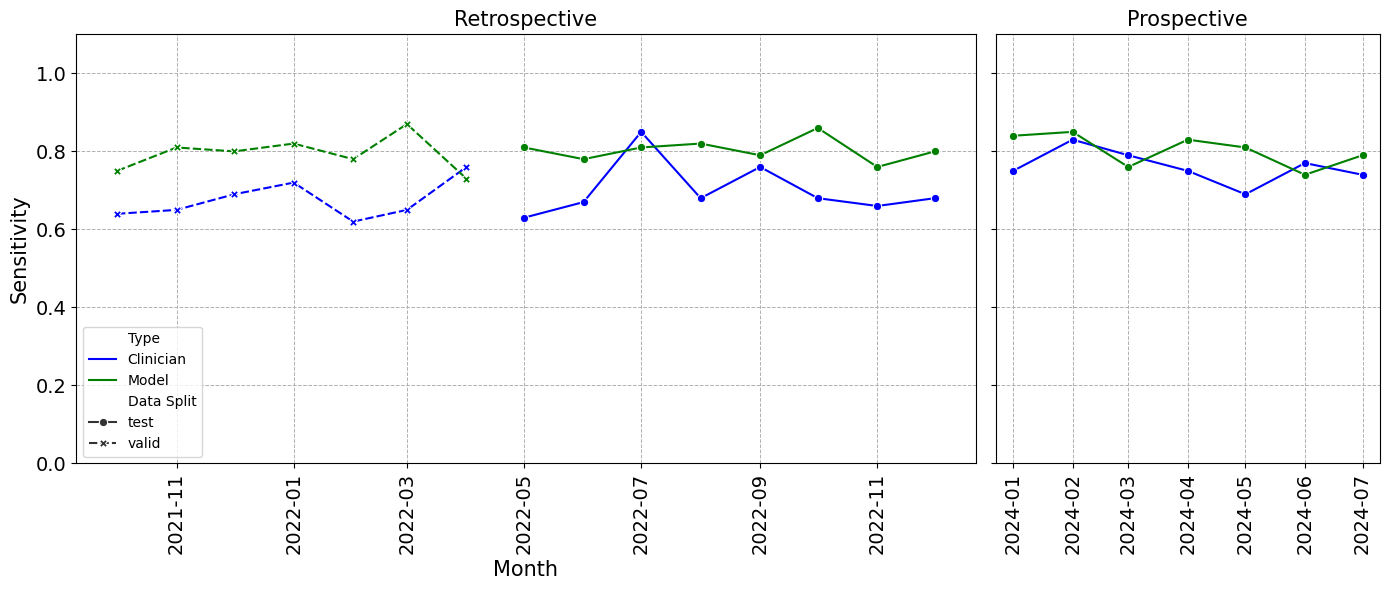

In [165]:
metric = 'Sensitivity'
combine = combine_dat[combine_dat.Metric == metric].dropna(subset='Month') 
# Filter the data into two subsets
data_prospective = combine[combine['Data Split'] == 'prospective']
data_retrospective = combine[combine['Data Split'] != 'prospective']

# Calculate the date range for each subset to determine the width ratio
range_prospective = pd.to_datetime(data_prospective['Month']).max() - pd.to_datetime(data_prospective['Month']).min()
range_retrospective = pd.to_datetime(data_retrospective['Month']).max() - pd.to_datetime(data_retrospective['Month']).min()

# Calculate width ratio
total_range = range_prospective + range_retrospective
width_ratio = [range_retrospective / total_range, range_prospective / total_range]

# Create the subplots with the calculated width ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': width_ratio},sharey=True)

# Plot for non-prospective data (left side)
sns.lineplot(
    data=data_retrospective,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    dashes=True, 
    markers=True, 
    palette = color_dict,
    ax=axes[0]
)
axes[0].set_title('Retrospective',fontsize=15)
axes[0].set_xlabel('Month',fontsize=15)
axes[0].set_ylabel(metric,fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14) 
axes[0].tick_params(axis='y', labelsize=14) 
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].set_ylim([0,1.1])
#axes[0].get_legend().remove()
# Plot for prospective data (right side)
sns.lineplot(
    data=data_prospective,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    palette = color_dict,
    dashes=True, 
    markers=True, 
    ax=axes[1]
)
axes[1].set_title('Prospective',fontsize=15)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='x', rotation=90, labelsize=14) 
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[1].get_legend().remove()

# Adjust layout and display the plots 
plt.ylabel(metric,fontsize=16)
plt.tight_layout()
plt.show()


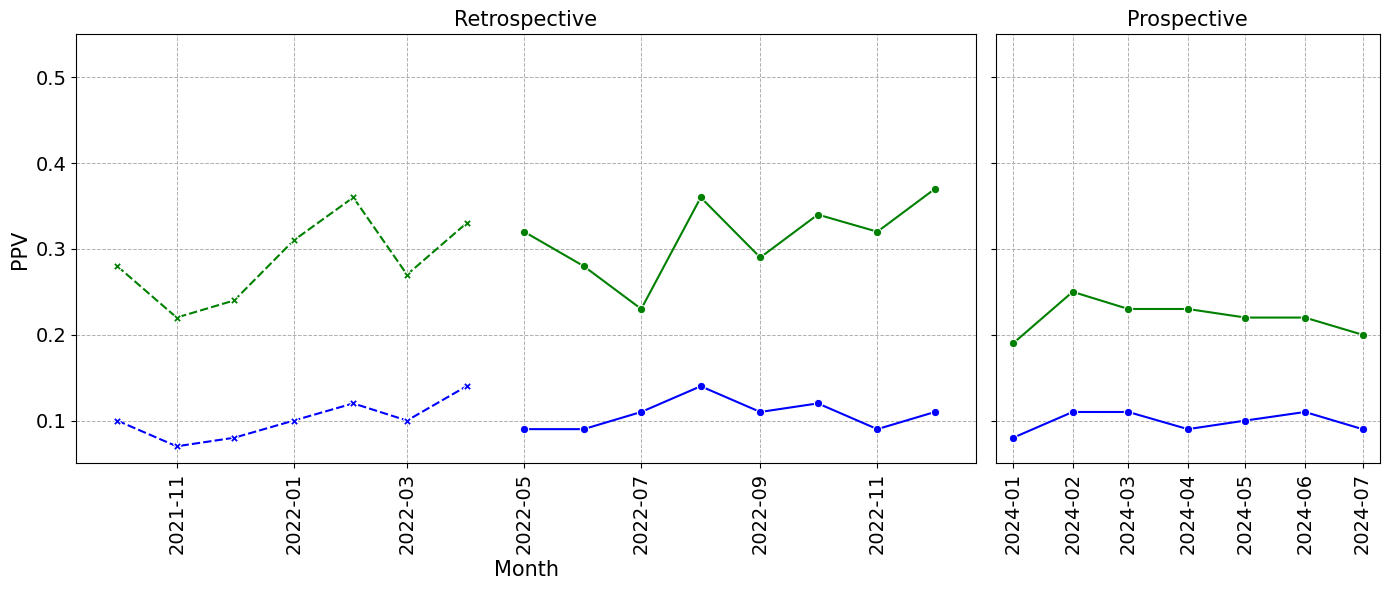

In [166]:
metric = 'PPV'
combine = combine_dat[combine_dat.Metric == metric].dropna(subset='Month')
# Filter the data into two subsets
data_prospective = combine[combine['Data Split'] == 'prospective']
data_retrospective = combine[combine['Data Split'] != 'prospective']

# Calculate the date range for each subset to determine the width ratio
range_prospective = pd.to_datetime(data_prospective['Month']).max() - pd.to_datetime(data_prospective['Month']).min()
range_retrospective = pd.to_datetime(data_retrospective['Month']).max() - pd.to_datetime(data_retrospective['Month']).min()

# Calculate width ratio
total_range = range_prospective + range_retrospective
width_ratio = [range_retrospective / total_range, range_prospective / total_range]

# Create the subplots with the calculated width ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': width_ratio},sharey=True)

# Plot for non-prospective data (left side)
sns.lineplot(
    data=data_retrospective,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    dashes=True, 
    markers=True, 
    palette = color_dict,
    ax=axes[0]
)
axes[0].set_title('Retrospective',fontsize=15)
axes[0].set_xlabel('Month',fontsize=15)
axes[0].set_ylabel(metric,fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14) 
axes[0].tick_params(axis='y', labelsize=14) 
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].get_legend().remove()
# Plot for prospective data (right side)
sns.lineplot(
    data=data_prospective,
    x='Month',
    y='Value',
    hue='Type',
    style='Data Split',
    palette = color_dict,
    dashes=True, 
    markers=True, 
    ax=axes[1]
)
axes[1].set_title('Prospective',fontsize=15)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='x', rotation=90, labelsize=14) 
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)   
axes[1].get_legend().remove()
axes[0].set_ylim([0.05,0.55])
# Adjust layout and display the plots 
plt.ylabel(metric,fontsize=16)
plt.tight_layout()
plt.show()


# Prospective timepoint

In [331]:
with open('mo_ds.pkl', 'rb') as f:
    mo_dict = pickle.load(f)
clinician_dat = pd.read_csv('timetrend_prbc_req_before_added.csv')
clinician_dat['Data Split'] = clinician_dat['Month'].map(mo_dict)
clinician_dat['Month'] = pd.to_datetime(clinician_dat['Month']) 
clinician_dat = clinician_dat.query(
    "RefTime in ['req_any_before_anes', 'req_any_before_1hr_anes', 'req_any_before_1d_anes', 'req_after_inroom_1h'] \
    and `Data Split` == 'prospective'") 
#prosp_model = pd.read_csv('prospective_tp_score.csv') 
#qprosp_model['Month']=pd.to_datetime(prosp_model['Month']) 

In [332]:
data_clinician.Month.unique()

<DatetimeArray>
['2024-02-01 00:00:00', '2024-01-01 00:00:00', '2024-03-01 00:00:00',
 '2024-04-01 00:00:00', '2024-05-01 00:00:00', '2024-06-01 00:00:00',
 '2024-07-01 00:00:00']
Length: 7, dtype: datetime64[ns]

## customized legends

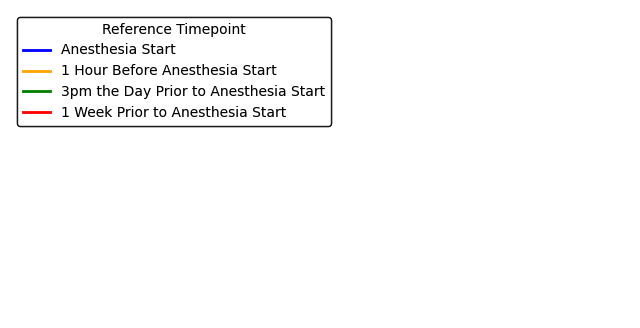

In [333]:

# Define labels
ref_time_labels = [
    'Anesthesia Start',
    '1 Hour Before Anesthesia Start',
    '3pm the Day Prior to Anesthesia Start',
    '1 Week Prior to Anesthesia Start'
    
]
data_split_labels = ['Validation Set', 'Test Set']

# Create legend handles for RefTime (lines with different colors)
ref_time_lines = [
    
    plt.Line2D([0], [0], color='blue', lw=2, label=ref_time_labels[0]),
    plt.Line2D([0], [0], color='orange', lw=2, label=ref_time_labels[1]),
    plt.Line2D([0], [0], color='green', lw=2, label=ref_time_labels[2]),
    
    plt.Line2D([0], [0], color='red', lw=2, label=ref_time_labels[3])
   
]
 

# Create the figure
fig, ax = plt.subplots(figsize=(8, 4))

# First legend: Reference Timepoints
legend1 = ax.legend(
    handles=ref_time_lines, 
    title='Reference Timepoint', 
    loc='upper left', 
    frameon=True
)
ax.add_artist(legend1)  # Add first legend to the plot
 

# Customize appearance of legends
for legend in [legend1]:
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(1)

# Hide the plot axes to show only the legends
plt.axis('off')

# Display the plot with two legends
plt.show()


## graph

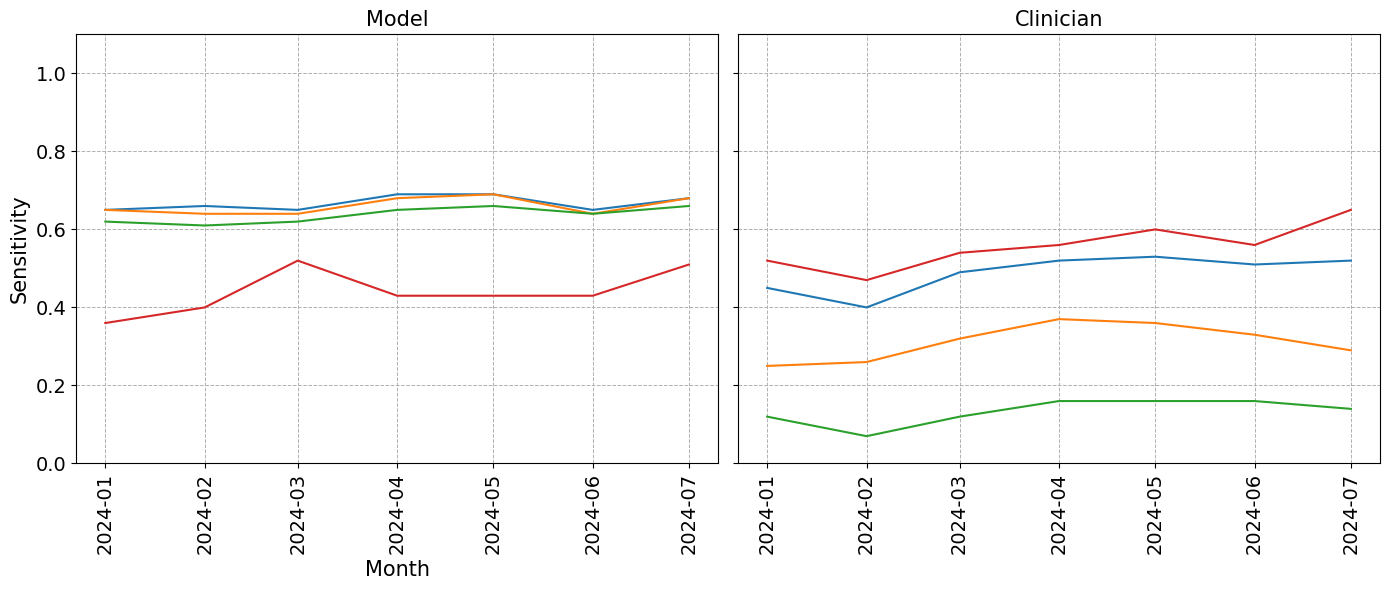

In [334]:
metric = 'Sensitivity'
data_clinician = clinician_dat[clinician_dat['Metric'] == metric] 
data_model = prosp_model[prosp_model['Metric'] == metric]

# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for model data (left side)
sns.lineplot(
    data=data_model,
    x='Month',
    y='Value',
    hue='RefTime',
    dashes=True,
    markers=True,
    ax=axes[0]
)
axes[0].set_title('Model', fontsize=15)
axes[0].set_xlabel('Month', fontsize=15)
axes[0].set_ylabel(metric, fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].set_ylim([0, 1.1])
axes[0].get_legend().remove()

# Plot for clinician data (right side)
sns.lineplot(
    data=data_clinician,
    x='Month',
    y='Value',
    hue='RefTime',
    dashes=True,
    markers=True,
    ax=axes[1]
)
axes[1].set_title('Clinician', fontsize=15)
axes[1].set_xlabel(None)  # Remove x-axis label for the right plot
axes[1].tick_params(axis='x', rotation=90, labelsize=14)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)

# Remove legend from the second plot
axes[1].get_legend().remove()

# Adjust layout to prevent overlapping and display the plots
plt.tight_layout()
plt.show()


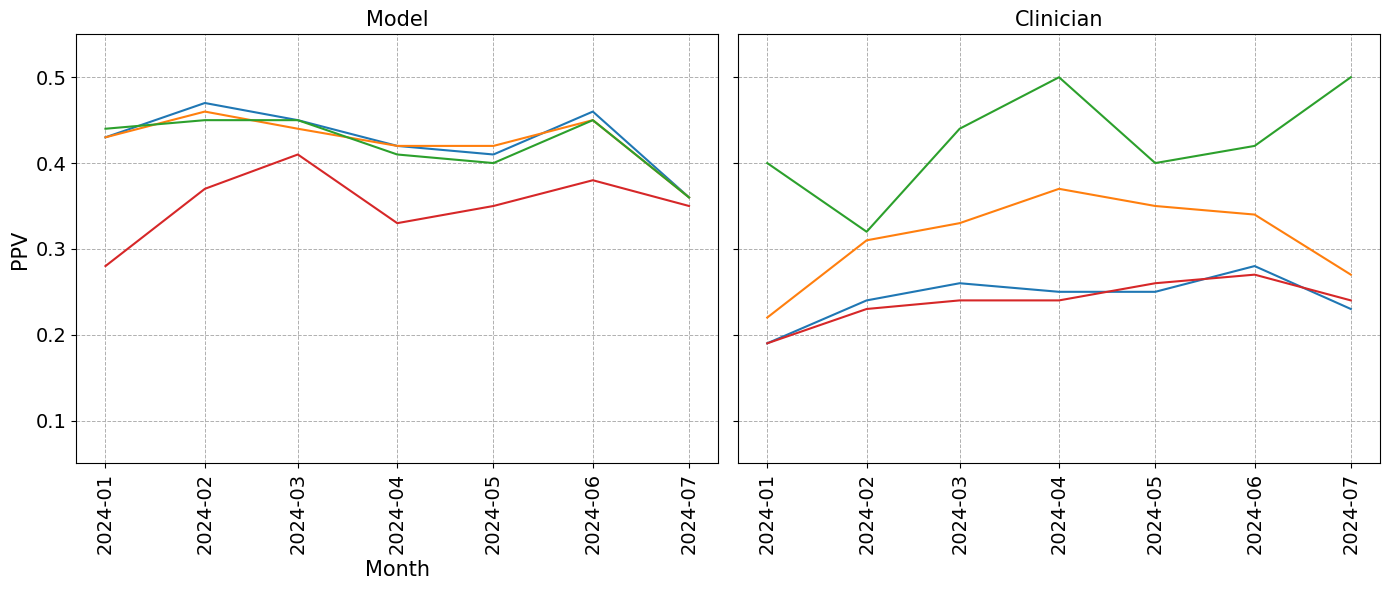

In [335]:
metric = 'PPV'
data_clinician = clinician_dat[clinician_dat['Metric'] == metric] 
data_model = prosp_model[prosp_model['Metric'] == metric]

# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for model data (left side)
sns.lineplot(
    data=data_model,
    x='Month',
    y='Value',
    hue='RefTime',
    dashes=True,
    markers=True,
    ax=axes[0]
)
axes[0].set_title('Model', fontsize=15)
axes[0].set_xlabel('Month', fontsize=15)
axes[0].set_ylabel(metric, fontsize=15)
axes[0].tick_params(axis='x', rotation=90, labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)  # Add gridlines
axes[0].set_ylim([0, 1.1])
axes[0].get_legend().remove()

# Plot for clinician data (right side)
sns.lineplot(
    data=data_clinician,
    x='Month',
    y='Value',
    hue='RefTime',
    dashes=True,
    markers=True,
    ax=axes[1]
)
axes[1].set_title('Clinician', fontsize=15)
axes[1].set_xlabel(None)  # Remove x-axis label for the right plot
axes[1].tick_params(axis='x', rotation=90, labelsize=14)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7)
axes[0].set_ylim([0.05,0.55])
# Remove legend from the second plot
axes[1].get_legend().remove()

# Adjust layout to prevent overlapping and display the plots
plt.tight_layout()
plt.show()
